<h1 style="text-align: center;" markdown="1">TP2: KNN filtrado de valores anomalos y estandarizacion de columnas</h1>
![](../data/icon_properati-data.png)

In [2]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

# modules
import knn as knnlibrary

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [96]:
properties =knnlibrary.get_dataset()
properties.describe()

/opt/conda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,3.732840e+05,322074.000000,322074.000000,4.009750e+05,4.009750e+05,4.009750e+05,300532.000000,3.669520e+05,2.509300e+05,3.271290e+05,46040.000000,244112.000000,4.342700e+04
mean,3.553372e+06,-34.699326,-59.168083,3.809285e+05,3.781469e+06,2.250482e+05,278.836074,5.615626e+03,1.894633e+03,5.418064e+03,15.472806,3.030720,4.449903e+03
std,3.767492e+05,2.181177,2.350918,1.308443e+06,6.118143e+06,3.628449e+05,2113.919504,3.301612e+06,3.539391e+03,2.066647e+04,122.820555,1.620854,1.001485e+05
min,3.427208e+06,-54.833014,-122.419415,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,5.000000e-05,1.000000,1.000000,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,6.948895e+06,52.619706,19.032799,6.500000e+08,8.212711e+08,5.000000e+07,200000.000000,2.000000e+09,1.271027e+06,4.000000e+06,7167.000000,40.000000,1.000150e+07


In [97]:
# transformo el campo fecha
properties_caba = knnlibrary.transform_date(properties)

properties_caba.describe()

/opt/conda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,created_on_year,created_on_month,created_on_day
count,3.732840e+05,322074.000000,322074.000000,4.009750e+05,4.009750e+05,4.009750e+05,300532.000000,3.669520e+05,2.509300e+05,3.271290e+05,46040.000000,244112.000000,4.342700e+04,442700.000000,442700.000000,442700.000000
mean,3.553372e+06,-34.699326,-59.168083,3.809285e+05,3.781469e+06,2.250482e+05,278.836074,5.615626e+03,1.894633e+03,5.418064e+03,15.472806,3.030720,4.449903e+03,2016.267612,5.916969,17.323738
std,3.767492e+05,2.181177,2.350918,1.308443e+06,6.118143e+06,3.628449e+05,2113.919504,3.301612e+06,3.539391e+03,2.066647e+04,122.820555,1.620854,1.001485e+05,0.800265,2.993135,8.561486
min,3.427208e+06,-54.833014,-122.419415,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,5.000000e-05,1.000000,1.000000,1.000000e+00,2015.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,3.000000,10.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,6.000000,19.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,7.000000,24.000000
max,6.948895e+06,52.619706,19.032799,6.500000e+08,8.212711e+08,5.000000e+07,200000.000000,2.000000e+09,1.271027e+06,4.000000e+06,7167.000000,40.000000,1.000150e+07,2017.000000,12.000000,31.000000


In [114]:
# filtro por CABA y GBA
# queremos solo las propiedades que tienen precio y eliminamos columnas que sabemos que no son 
#redundantes y que no nos servirian para knn
# eliminamos propiedades con mas de 54 pisos
properties_caba = knnlibrary.clean_dataset(properties)

# las expensas tienen demasiados nulos por lo que voy a eliminar esa columna
properties_caba = properties_caba.drop(['expenses'], axis = 1)

properties_caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10543 entries, 385 to 80073
Data columns (total 14 columns):
property_type              10543 non-null object
place_name                 10543 non-null object
place_with_parent_names    10543 non-null object
state_name                 10543 non-null object
lat                        9620 non-null float64
lon                        9620 non-null float64
price                      10543 non-null float64
surface_total_in_m2        10543 non-null float64
surface_covered_in_m2      10543 non-null float64
floor                      10543 non-null float64
rooms                      10543 non-null float64
created_on_year            10543 non-null int64
created_on_month           10543 non-null int64
created_on_day             10543 non-null int64
dtypes: float64(7), int64(3), object(4)
memory usage: 1.2+ MB


In [115]:
from sklearn.preprocessing import Imputer
imputer_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)
properties_caba['floor'] = properties_caba[['floor']].fillna(1)
properties_caba['rooms'] = properties_caba[['rooms']].fillna(1)

properties_caba["surface_total_in_m2"] = imputer_mean.fit_transform(properties_caba[["surface_total_in_m2"]])
properties_caba["surface_covered_in_m2"] = imputer_mean.fit_transform(properties_caba[["surface_covered_in_m2"]])
properties_caba["lat"] = imputer_mean.fit_transform(properties_caba[["lat"]])
properties_caba["lon"] = imputer_mean.fit_transform(properties_caba[["lon"]])

properties_caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10543 entries, 385 to 80073
Data columns (total 14 columns):
property_type              10543 non-null object
place_name                 10543 non-null object
place_with_parent_names    10543 non-null object
state_name                 10543 non-null object
lat                        10543 non-null float64
lon                        10543 non-null float64
price                      10543 non-null float64
surface_total_in_m2        10543 non-null float64
surface_covered_in_m2      10543 non-null float64
floor                      10543 non-null float64
rooms                      10543 non-null float64
created_on_year            10543 non-null int64
created_on_month           10543 non-null int64
created_on_day             10543 non-null int64
dtypes: float64(7), int64(3), object(4)
memory usage: 1.2+ MB


In [116]:
# atributos categoricos
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
properties_caba = knnlibrary.encoder_attributes(properties_caba, encoder)

#properties_caba.tail()

/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
# separamos el train de traing para validarlo luego usando un 30% de los datos
from sklearn.model_selection import train_test_split
import datetime

now = datetime.datetime.now()

X, y = properties_caba.iloc[:, properties_caba.columns != 'price'].values, properties_caba.iloc[:, properties_caba.columns == 'price'].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.1, random_state=now.microsecond)
    
len(X_test), len(X_train)

(1055, 9488)

In [118]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

clf.fit(X_train, y_train)
clf.score(X_test,y_test)

/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.87552535317329117

In [88]:
# a cada dato le restamos la media y lo dividimos por su desviacion standard
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std =stdsc.fit_transform(X_test)

In [89]:
# aplicamos algoritmos
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
sbs = knnlibrary.SBS(knn, k_features=1, scoring=mean_squared_error)
sbs.fit(X_train_std, y_train)

In [90]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11),
 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
 (0, 2, 3, 4, 5, 6, 7, 8, 9, 10),
 (0, 2, 3, 4, 5, 7, 8, 9, 10),
 (0, 3, 4, 5, 7, 8, 9, 10),
 (0, 3, 5, 7, 8, 9, 10),
 (0, 3, 7, 8, 9, 10),
 (0, 3, 8, 9, 10),
 (0, 8, 9, 10),
 (0, 8, 10),
 (0, 8),
 (0,)]

In [91]:
sbs.scores_

[42278661601.598938,
 47158766387.224518,
 50104614482.876137,
 61380632646.310287,
 64588425735.890785,
 69009123909.686478,
 74175041262.051941,
 79413143180.834152,
 99068005087.028778,
 111082655100.04437,
 128463779401.0062,
 144293503697.44626,
 165450415364.75854,
 141532795262.74747]

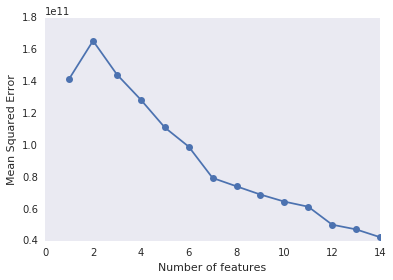

In [92]:
# graficamos
k_feat = [len(k) for k in sbs.subsets_]
plot(k_feat, sbs.scores_, marker='o')
#ylim([0.0, 1.1])
ylabel('Mean Squared Error')
xlabel('Number of features')
grid()
show()

In [93]:
# hacemos una prueba en el set original
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.997468334667
Test accuracy: 0.696346889611


In [39]:
k_param = list(sbs.subsets_[0])
print(properties_caba.iloc[:, properties_caba.columns != 'price'].columns[k_param])

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor',
       'rooms', 'expenses', 'created_on_year', 'created_on_month',
       'created_on_day'],
      dtype='object')


In [40]:
# y como clasifica tomando solo los features devueltos
knn.fit(X_train_std[:, k_param], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k_param], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k_param], y_test))

Training accuracy: 0.996093741728
Test accuracy: 0.650929678649


In [94]:
# grid search de k y random search de p
k_scores = []
k_list = []
p_list = []
labels = []

best_score = 0
best_k = 5
i = 5
best_p = 0

for p in range(2,15):
    knn = KNeighborsRegressor(n_neighbors=i, weights='distance', p=p)
    knn.fit(X_train_std[:, k_param], y_train)

    p_list.append(p)
    k_list.append(i)

    sc = knn.score(X_test_std[:, k_param], y_test)

    labels.append(str(round(sc,3)))
    k_scores.append(sc)

    if(sc > best_score):
        best_score = sc
        best_k = i
        best_p = p

mu = np.mean(k_scores)
v = np.var(k_scores)

k_scores = list(map(lambda x: ((x-mu)/v)*50, k_scores))

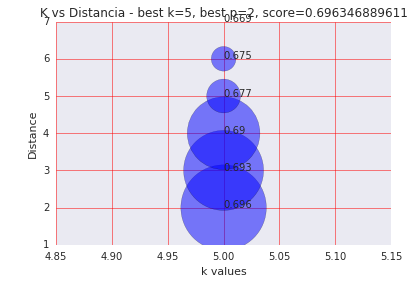

In [95]:
# graficamos
fig, ax = plt.subplots()
ax.scatter(k_list, p_list, s=k_scores, alpha=0.5)

title = "K vs Distancia - best k=%s, best p=%s, score=%s"%(best_k, best_p, best_score)
plt.title(title)
ylabel('Distance')
xlabel('k values')

for i, label in enumerate(labels):
    ax.annotate(label, (k_list[i],p_list[i]))

ax.grid(linestyle='-', linewidth='0.5', color='red')

# plt.savefig('/home/jovyan/work/TP/TP2/img/best_k=%s-best_p=%s-score=%s.png'%(best_k, best_p, best_score));

# TEST

In [107]:
# leemos set de test
test_df = pd.read_csv('../data/test/properati_dataset_testing_noprice.csv', low_memory=False)
test_df.head()

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,-58.363464,0.0,NaN,NaN,NaN,NaN,Edificio BA Houses situado frente al Dique 3 d...
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,El departamento cuenta con un living-comedor a...
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,-58.412880,53.0,48.0,NaN,NaN,1500,IMPECABLE TORRE COY III – DEPA...
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,51.0,51.0,NaN,NaN,NaN,LIVING COMEDOR CON PISOS DE PO...


In [122]:
# transformamos atributos categoricos
test_df['place_name'] = encoder.fit_transform(test_df[['place_name']])
test_df['state_name'] = encoder.fit_transform(test_df[['state_name']])
test_df['place_with_parent_names'] = encoder.fit_transform(test_df[['place_with_parent_names']])
test_df['property_type'] = encoder.fit_transform(test_df[['property_type']])

# tranformamos fechas
X_test_df = knnlibrary.transform_date(test_df)
X_test_df = X_test_df[['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor',
       'rooms', 'created_on_year', 'created_on_month',
       'created_on_day']]

# completamos valores nan
from sklearn.preprocessing import Imputer
imputer_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)
X_test_df['floor'] = X_test_df[['floor']].fillna(1)
X_test_df['rooms'] = X_test_df[['rooms']].fillna(1)

X_test_df["surface_total_in_m2"] = imputer_mean.fit_transform(X_test_df[["surface_total_in_m2"]])
X_test_df["surface_covered_in_m2"] = imputer_mean.fit_transform(X_test_df[["surface_covered_in_m2"]])
X_test_df["lat"] = imputer_mean.fit_transform(X_test_df[["lat"]])

X_test_df["lon"] = imputer_mean.fit_transform(X_test_df[["lon"]])

#X_test_std_df = stdsc.transform(X_test_df)

X_test_df.info()

/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:20:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14166 entries, 0 to 14165
Data columns (total 13 columns):
property_type              14166 non-null int64
place_name                 14166 non-null int64
place_with_parent_names    14166 non-null int64
state_name                 14166 non-null int64
lat                        14166 non-null float64
lon                        14166 non-null float64
surface_total_in_m2        14166 non-null float64
surface_covered_in_m2      14166 non-null float64
floor                      14166 non-null float64
rooms                      14166 non-null float64
created_on_year            14166 non-null int64
created_on_month           14166 non-null int64
created_on_day             14166 non-null int64
dtypes: float64(6), int64(7)
memory usage: 1.4 MB


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [123]:
# prediccion del set de test
#knn = KNeighborsRegressor(n_neighbors=best_k, weights='distance', p=best_p)
#knn.fit(X_train_std[:, k_param], y_train)
X_test_df['prediction'] = clf.predict(X_test_df)
X_test_df.head(10)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,property_type,place_name,place_with_parent_names,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,created_on_year,created_on_month,created_on_day,prediction
0,1,152,219,4,-34.610988,-58.363464,0.0,359.471588,1.0,1.0,2017,8,24,124529.925517
1,1,29,180,3,-34.629923,-58.465820,0.0,359.471588,1.0,1.0,2017,8,25,-683.504031
2,1,136,210,4,-34.589363,-58.412880,53.0,48.000000,1.0,1.0,2017,8,1,345549.378124
3,1,40,193,4,-34.629923,-58.465820,39.0,39.000000,1.0,1.0,2017,8,1,-37428.197502
4,1,40,193,4,-34.629923,-58.465820,51.0,51.000000,1.0,1.0,2017,8,1,206545.147112
5,1,40,193,4,-34.629923,-58.465820,39.0,39.000000,1.0,1.0,2017,8,1,-37428.197502
6,1,40,193,4,-34.629923,-58.465820,39.0,39.000000,1.0,1.0,2017,8,1,-37428.197502
7,1,40,193,4,-34.629923,-58.465820,39.0,39.000000,1.0,1.0,2017,8,1,-37428.197502
8,1,47,195,4,-34.578721,-58.457095,67.0,67.000000,1.0,1.0,2017,8,1,429732.761377
9,1,7,184,4,-34.629923,-58.465820,47.0,47.000000,1.0,1.0,2017,8,1,22229.865600


In [124]:
# guardo el file
output = pd.DataFrame( data={"id":test_df["id"], "price_usd":X_test_df['prediction']} )
output.to_csv( "../data/result/result_gb_"+str(now)+".csv", index=False, quoting=3 )